In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from pymystem3 import Mystem
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import ngrams
from gensim.models.phrases import Phrases, Phraser
import statistics
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from statistics import mean, stdev

In [2]:
from google.colab import files

uploaded = files.upload()

Saving news2.csv to news2.csv


In [5]:
pd.set_option('max_colwidth', 150)
pd.set_option('display.width', 700)

In [6]:
news = pd.read_csv('/content/news2.csv')
news

source                                                                   title                                                                                                                                                   text                                 publication_date          rubric     subrubric                                                                                                                                          tags
0      lenta.ru                                                          Синий богатырь  В 1930-е годы Советский Союз охватила лихорадка — в десятилетие бурной индустриализации повсюду гремели сообщения о новых трудовых подвигах просто...                        2020-08-30T00:01:00+03:00       Экономика  Госэкономика                                                                                                                                           NaN
1      lenta.ru                          Загитова согласилась вести «Ледниковый период»  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...                        2020-08-31T20:04:00+03:00           Спорт   Зимние виды                                                                                                                                           NaN
2      lenta.ru                               Объяснена опасность однообразного питания  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...                        2020-08-31T20:07:00+03:00        Из жизни           Еда                                                                                                                                           NaN
3      lenta.ru                                              «Предохраняться? А зачем?»  В 2019 году телеканал «Ю» запустил адаптацию знаменитого телешоу «Беременна в 16», которое в прошлом выходило на MTV. Украинская версия этого же ш...                        2020-08-30T00:04:00+03:00  Интернет и СМИ    ТВ и радио                                                                                                                                           NaN
4      lenta.ru                             Ефремов систематически употреблял наркотики  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...                        2020-08-31T18:27:00+03:00        Культура          Кино                                                                                                                                           NaN
...         ...                                                                     ...                                                                                                                                                    ...                                              ...             ...           ...                                                                                                                                           ...
20790    ria.ru    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  МОСКВА, 23 дек - РИА Новости.  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а б...  00:39 23.12.2019  (обновлено: 18:27 03.03.2020)             NaN           NaN                                                      Россия, Александр Носатов (вице-адмирал), Балтийский флот ВМФ России, НАТО, Безопасность
20791    ria.ru  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  МОСКВА, 23 дек — РИА Новости.  Певец  Валерий Сюткин  в интервью порталу  Nation News  прокомментировал  видео  с шуткой наставника шоу " Голос " ...  00:50 23.12.2019  (обновлено: 18:27 03.03.2020)             NaN           NaN  Культура, 

In [7]:
news['text'] = news['text'].replace('\n', ' ', regex=True)
news

source                                                                   title                                                                                                                                                   text                                 publication_date          rubric     subrubric                                                                                                                                          tags
0      lenta.ru                                                          Синий богатырь  В 1930-е годы Советский Союз охватила лихорадка — в десятилетие бурной индустриализации повсюду гремели сообщения о новых трудовых подвигах просто...                        2020-08-30T00:01:00+03:00       Экономика  Госэкономика                                                                                                                                           NaN
1      lenta.ru                          Загитова согласилась вести «Ледниковый период»  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...                        2020-08-31T20:04:00+03:00           Спорт   Зимние виды                                                                                                                                           NaN
2      lenta.ru                               Объяснена опасность однообразного питания  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...                        2020-08-31T20:07:00+03:00        Из жизни           Еда                                                                                                                                           NaN
3      lenta.ru                                              «Предохраняться? А зачем?»  В 2019 году телеканал «Ю» запустил адаптацию знаменитого телешоу «Беременна в 16», которое в прошлом выходило на MTV. Украинская версия этого же ш...                        2020-08-30T00:04:00+03:00  Интернет и СМИ    ТВ и радио                                                                                                                                           NaN
4      lenta.ru                             Ефремов систематически употреблял наркотики  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...                        2020-08-31T18:27:00+03:00        Культура          Кино                                                                                                                                           NaN
...         ...                                                                     ...                                                                                                                                                    ...                                              ...             ...           ...                                                                                                                                           ...
20790    ria.ru    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  МОСКВА, 23 дек - РИА Новости.  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а б...  00:39 23.12.2019  (обновлено: 18:27 03.03.2020)             NaN           NaN                                                      Россия, Александр Носатов (вице-адмирал), Балтийский флот ВМФ России, НАТО, Безопасность
20791    ria.ru  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  МОСКВА, 23 дек — РИА Новости.  Певец  Валерий Сюткин  в интервью порталу  Nation News  прокомментировал  видео  с шуткой наставника шоу " Голос " ...  00:50 23.12.2019  (обновлено: 18:27 03.03.2020)             NaN           NaN  Культура, 

Удаление первого предложения в тексте, если источник - РИА.

In [8]:
nltk.download('punkt')

def remove_first_sentence(text):
    sentences = nltk.sent_tokenize(text)
    if len(sentences) > 1:
        return ' '.join(sentences[1:])
    else:
        return ""

news.loc[news['source'] == 'ria.ru', 'text'] = news.loc[news['source'] == 'ria.ru', 'text'].apply(remove_first_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Подсчет самых популярных слов в первых 3-х предложениях

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

top_words = Counter()

for text in news['text']:
    sentences = sent_tokenize(text)

    first_three_sentences = sentences[:3]

    combined_text = ' '.join(first_three_sentences)
    tokens = word_tokenize(combined_text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    words = [token for token in tokens if token not in stop_words]
    word_counts = Counter(words)
    top_words.update(word_counts)

top_100_words = top_words.most_common(100)

print("Топ 100 слов с маленькой буквы:")
for word, count in top_100_words:
    print(f"Слово: {word}, Частота: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Топ 100 слов с маленькой буквы:
Слово: сообщает, Частота: 4303
Слово: россии, Частота: 4124
Слово: сша, Частота: 3961
Слово: новости, Частота: 3442
Слово: риа, Частота: 3391
Слово: коронавируса, Частота: 2980
Слово: заявил, Частота: 2791
Слово: года, Частота: 2788
Слово: сообщил, Частота: 2400
Слово: ранее, Частота: 2373
Слово: человек, Частота: 2351
Слово: это, Частота: 2271
Слово: говорится, Частота: 2209
Слово: коронавирусом, Частота: 1911
Слово: время, Частота: 1880
Слово: также, Частота: 1820
Слово: которые, Частота: 1725
Слово: президент, Частота: 1643
Слово: который, Частота: 1605
Слово: страны, Частота: 1579
Слово: году, Частота: 1576
Слово: рф, Частота: 1567
Слово: словам, Частота: 1462
Слово: число, Частота: 1350
Слово: рассказал, Частота: 1311
Слово: случаев, Частота: 1279
Слово: глава, Частота: 1266
Слово: ссылкой, Частота: 1229
Слово: тысяч, Частота: 1221
Слово: данным, Частота: 1183
Слово: сказал, Частота: 1182
Слово: сайте, Частота: 1115
Слово: президента, Частота: 1115


Подсчет самых популярных имен собственных в первых 3 предложениях

In [14]:
top_words = Counter()

for text in news['text']:
    sentences = sent_tokenize(text)

    first_three_sentences = sentences[:3]
    first_three_sentences = [sentence.split(' ', 1)[1] if len(sentence.split(' ')) > 1 else '' for sentence in first_three_sentences]

    combined_text = ' '.join(first_three_sentences)
    tokens = word_tokenize(combined_text)
    tokens = [token for token in tokens if token.isalpha()]
    words = [token for token in tokens if token.istitle()]
    word_counts = Counter(words)
    top_words.update(word_counts)

top_500_words = top_words.most_common(500)

print("Топ 100 имен собственных:")
for word, count in top_500_words:
    print(f"Слово: {word}, Частота: {count}")

Топ 100 имен собственных:
Слово: России, Частота: 4102
Слово: Новости, Частота: 3386
Слово: Трамп, Частота: 844
Слово: Москве, Частота: 835
Слово: Украины, Частота: 825
Слово: Владимир, Частота: 743
Слово: Twitter, Частота: 699
Слово: Москвы, Частота: 647
Слово: Александр, Частота: 581
Слово: Дональд, Частота: 580
Слово: Сергей, Частота: 515
Слово: Белоруссии, Частота: 512
Слово: Россия, Частота: 488
Слово: The, Частота: 440
Слово: Путин, Частота: 416
Слово: Китая, Частота: 412
Слово: Трампа, Частота: 400
Слово: Дмитрий, Частота: 366
Слово: Михаил, Частота: 349
Слово: Instagram, Частота: 341
Слово: Алексей, Частота: 329
Слово: Sputnik, Частота: 324
Слово: Telegram, Частота: 322
Слово: Великобритании, Частота: 320
Слово: Германии, Частота: 284
Слово: Китае, Частота: 279
Слово: Владимира, Частота: 278
Слово: Госдумы, Частота: 275
Слово: Ирана, Частота: 270
Слово: Россию, Частота: 265
Слово: Сирии, Частота: 264
Слово: Facebook, Частота: 262
Слово: Российской, Частота: 261
Слово: Daily, Ча

Нахождение популярных имен собственных из нескольких слов

In [15]:
def split_sentences(text):
    sentences = re.split(r'[.!?]', text)
    return [sentence.strip() for sentence in sentences if sentence.strip()]

sentences = [split_sentences(text)[:3] for text in news['text']]
sentences = [[re.sub(r'^\w+\s*', '', sentence) for sentence in text] for text in sentences]
phrases = []
for text in sentences:
    for sentence in text:
        words = sentence.split()
        phrases.extend([words[i:i+2] for i in range(len(words)-1) if words[i][0].isupper() and words[i+1][0].isupper()])
phrase_counts = Counter([' '.join(phrase) for phrase in phrases])
top_phrases = phrase_counts.most_common(700)

for phrase, count in top_phrases:
    print(phrase, count)

РИА Новости 3131
Дональд Трамп 558
США Дональд 465
Владимир Путин 326
Дональда Трампа 236
России Владимир 193
Daily Mail 171
РИА Новости, 157
США Дональда 138
Владимира Путина 131
Майк Помпео 128
США Майк 123
МЧС России 122
Российской Федерации 120
Великой Отечественной 113
New York 105
Саудовской Аравии 101
Касема Сулеймани 100
Владимир Зеленский 96
Михаил Мишустин 95
Михаила Ефремова 93
Ким Чен 91
РЕН ТВ 90
Сергей Собянин 89
Александр Лукашенко 87
York Times 87
Роман Вильфанд 82
Украины Владимир 81
Дмитрий Песков 81
Алексей Пушков 71
The Sun 70
Григорию Березкину 70
Минобороны России 70
Fox News 69
Белоруссии Александр 67
Сергей Лавров 67
Москвы Сергей 67
Владимиром Путиным 67
Гидрометцентра Роман 67
СБ ООН 63
Джорджа Флойда 60
Николас Мадуро 60
Wall Street 59
РФ Владимир 59
МИД России 58
Street Journal 58
Мария Захарова 57
МИД РФ 57
Совета Федерации 54
Джо Байден 52
Чен Ын 51
Александра Лукашенко 48
Владимира Зеленского 48
Crew Dragon 48
Минобороны РФ 48
Washington Post 47
Березкину

Нахождение самых популярных n-грамм

In [16]:
corpus = ' '.join(news['text'])
tokens = corpus.split()
n = 2
ngram_counts = Counter(ngrams(tokens, n))
top_ngrams = ngram_counts.most_common(1000)

for ngram, count in top_ngrams:
    print(' '.join(ngram), count)

в России 5297
а также 4993
РИА Новости 3894
что в 3839
говорится в 3717
России и 3714
Об этом 3577
ситуации с 3443
COVID-19 в 3388
данные о 3245
с COVID-19 3196
на портале 3146
о ситуации 3103
и мире 3034
представлены на 3031
мире представлены 3025
портале стопкоронавирус.рф 2902
При этом 2893
в том 2872
стопкоронавирус.рф . 2816
По его 2638
том числе 2636
том, что 2561
и в 2560
По словам 2508
его словам, 2481
Кроме того, 2441
заявил, что 2351
- сказал 2342
По данным 2299
, что 2250
во время 2213
о том, 2199
из них 2096
- говорится 2093
связи с 2015
и не 1994
2019 года 1944
Последние данные 1802
отметил, что 1718
в связи 1646
на сайте 1556
— это 1554
. В 1548
ссылкой на 1531
со ссылкой 1527
в мире 1524
в стране 1462
в этом 1452
в рамках 1440
то, что 1400
в интервью 1398
— сказал 1389
в Москве 1374
в сообщении. 1374
По последним 1360
не только 1348
в ходе 1305
в течение 1274
в городе 1265
— в 1224
Актуальные данные 1223
этом сообщает 1205
в результате 1205
в США 1195
случаев заражения 1

In [17]:
data = pd.DataFrame(news[["title", "text"]])
data

title                                                                                                                                                   text
0                                                              Синий богатырь  В 1930-е годы Советский Союз охватила лихорадка — в десятилетие бурной индустриализации повсюду гремели сообщения о новых трудовых подвигах просто...
1                              Загитова согласилась вести «Ледниковый период»  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...
2                                   Объяснена опасность однообразного питания  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...
3                                                  «Предохраняться? А зачем?»  В 2019 году телеканал «Ю» запустил адаптацию знаменитого телешоу «Беременна в 16», которое в прошлом выходило на MTV. Украинская версия этого же ш...
4                                 Ефремов систематически употреблял наркотики  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
...                                                                       ...                                                                                                                                                    ...
20790    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...
20791  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  Певец  Валерий Сюткин  в интервью порталу  Nation News  прокомментировал  видео  с шуткой наставника шоу " Голос "  Сергея Шнурова  над бывшим уча...
20792      Владимир Путин откроет железнодорожное движение по Крымскому мосту  Владимир Путин  примет участие в церемонии открытия железнодорожной части  Крымского моста  через  Керченский пролив , по которой будут курсироват...
20793   Концертный директор прокомментировал скандал Бочкаревой с наркотиками  Концертный директор Сергей Лавров высказался в эфире телеканала  НТВ  на тему скандала  Натальи Бочкаревой  с наркотиками, встав на защиту актрисы...
20794                                                      День Ростехнадзора  Постановление о его празднование было принято 4 августа 2006 года Коллегией Федеральной службы по экологическому, технологическому и атомному надз...

[20795 rows x 2 columns]

Удаление схожих текстов

In [18]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

cosine_sim_matrix = 0
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Порог сходства, выше которого тексты считаются очень похожими
threshold = 0.5

indices_to_remove = []

for i in range(len(data)):
    for j in range(i+1, len(data)):
        if cosine_sim_matrix[i][j] > threshold:
            indices_to_remove.append(j)

cosine_sim_matrix = 0
data.drop(data.index[indices_to_remove], inplace=True)
data

title                                                                                                                                                   text
0                                                              Синий богатырь  В 1930-е годы Советский Союз охватила лихорадка — в десятилетие бурной индустриализации повсюду гремели сообщения о новых трудовых подвигах просто...
1                              Загитова согласилась вести «Ледниковый период»  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...
2                                   Объяснена опасность однообразного питания  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...
3                                                  «Предохраняться? А зачем?»  В 2019 году телеканал «Ю» запустил адаптацию знаменитого телешоу «Беременна в 16», которое в прошлом выходило на MTV. Украинская версия этого же ш...
4                                 Ефремов систематически употреблял наркотики  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
...                                                                       ...                                                                                                                                                    ...
20789        В России пройдут учения по обеспечению устойчивой работы рунета   Всероссийские учения по обеспечению устойчивой работы рунета и сети связи общего пользования пройдут в понедельник, в них примут участие операторы...
20790    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...
20791  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  Певец  Валерий Сюткин  в интервью порталу  Nation News  прокомментировал  видео  с шуткой наставника шоу " Голос "  Сергея Шнурова  над бывшим уча...
20793   Концертный директор прокомментировал скандал Бочкаревой с наркотиками  Концертный директор Сергей Лавров высказался в эфире телеканала  НТВ  на тему скандала  Натальи Бочкаревой  с наркотиками, встав на защиту актрисы...
20794                                                      День Ростехнадзора  Постановление о его празднование было принято 4 августа 2006 года Коллегией Федеральной службы по экологическому, технологическому и атомному надз...

[18139 rows x 2 columns]

In [19]:
data = data.assign(fulltext=data['text'])
data

title                                                                                                                                                   text                                                                                                                                               fulltext
0                                                              Синий богатырь  В 1930-е годы Советский Союз охватила лихорадка — в десятилетие бурной индустриализации повсюду гремели сообщения о новых трудовых подвигах просто...  В 1930-е годы Советский Союз охватила лихорадка — в десятилетие бурной индустриализации повсюду гремели сообщения о новых трудовых подвигах просто...
1                              Загитова согласилась вести «Ледниковый период»  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...
2                                   Объяснена опасность однообразного питания  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...
3                                                  «Предохраняться? А зачем?»  В 2019 году телеканал «Ю» запустил адаптацию знаменитого телешоу «Беременна в 16», которое в прошлом выходило на MTV. Украинская версия этого же ш...  В 2019 году телеканал «Ю» запустил адаптацию знаменитого телешоу «Беременна в 16», которое в прошлом выходило на MTV. Украинская версия этого же ш...
4                                 Ефремов систематически употреблял наркотики  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
...                                                                       ...                                                                                                                                                    ...                                                                                                                                                    ...
20789        В России пройдут учения по обеспечению устойчивой работы рунета   Всероссийские учения по обеспечению устойчивой работы рунета и сети связи общего пользования пройдут в понедельник, в них примут участие операторы...  Всероссийские учения по обеспечению устойчивой работы рунета и сети связи общего пользования пройдут в понедельник, в них примут участие операторы...
20790    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...
20791  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  Певец  Валерий Сюткин  в интервью порталу  Nation News  прокомментировал  видео  с шуткой наставника шоу " Голос "  Сергея Шнурова  над бывшим уча...  Певец  Валерий Сюткин  в интервью порталу  Nation News  прокомментировал  видео  с шуткой наставника шоу " Голос "  Сергея Шнурова  над бывшим уча...
20793   Концертный директор прокомментировал скандал Бочкаревой с наркотиками  Концертный директор Сергей Лавров высказался в эфире телеканала  НТВ  на тему скандала  Натальи Бочкаревой  с наркотиками, встав на защиту актрисы...  Концертный директор Сергей Лавров высказал

In [20]:
datacopy = data.copy()

In [ ]:
data = datacopy.copy()

In [21]:
data2 = data.copy()

In [22]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords_ru = set(stopwords.words('russian'))
stopwords_en = set(stopwords.words('english'))
mystem = Mystem()
lemmatizer_en = WordNetLemmatizer()

words = "понедельник mash tv sport24 mighty cbs частность интервью предпологать приходиться редакция прошлый mgm пята рассказываться благодаря предположительно соцсеть сразу прояснивать вряд решительно выходить двоюродный предлагать происходить соответственно оставаться составлять sport сей com соответствующий facebook появляться именно менее ru argus media медуза el pais северпост org reform by medialeaks фонтанка почему снова sport24 wtxl спрашивать знать узнать восьмеро воскресение мало предпологать скоро свой свое bild прим синьхуа смог трое навсегда возможно оно чей следовательно действительно вновь baza влево вправо сей недавно должный помимо newsweek подкаст мимоходом просить попросить хотеть просто упоминать прямо нами ред иметь какой мочь просто тип смочь дело все нужно всё отвечать подчеркивать подчёркивать вопрос добавлять новое новый старое старый день вечер ночь утро ряд вид поздно рано хороший момент имя вместе представлять постольку поскольку метр затем многие посчитать настолько насколько трансляция свидетельствовать вестись вести youtube вероятность radio писать reykjavík grapevine telegram свидетельствовать nation летний news нтв высказаться высказываться видео вероятно вдвоем вдвоём втроём втроем социальный сеть объясняться видно делать сделать снимать онлайн объяснить объяснять онлайн репортаж более подробнее втроем вдвое втрое sputnik далее минувший sunday думать рат тв эфир корреспондент программа официальный результат пора радио материал сутки день сегодня подчеркнуть раскрыть раскрывать показать показывать доступен сегодняшний сми ru financial buzzfeed world star nbc today national interest специалист mirror le firago life shot telegraph et hill group associated press заявление пресс новостной столото sky morning breaking south china guardian washington sun the вконтакте eveling standart brent express wall day рен тв street journal bloomberg бриф brief capital channel прайм prime post reuters network global issue defence blog блог влог aljazeera издательство bbc new york time ria.ru homadske daily mail fox эксперт газета content review ведомство обзор журнал рбк журналист наш санкэй известие современник коммерсантъ комсомолец ведомость комсомольский интерфакс regnium весть пресса росбалт приводить утверждать ниже выше выкладывать телеканал канал публиковать считать публикация называть размещать прокомментировать признавать признаваться передать передавать информация сайт ссылка беседа вторник среда признавать опубликовывать сам любой сегодня свыше заявлять время неделя месяц данный последний заявление интервью указывать написать подтверждать подтвердить каждый пояснять оказываться некоторые уточнять час весь поэтому тасс twitter instagram аккаунт rt meduza риа новости мнение среди отмечаться согласно этот из-за данные пока сообщаться очень миллиард быть говорить миллион рассказывать говориться сообщение объявлять поэтому являться четверг два ранее наш один второй источник пресс-служба отмечать издание первый третий четвертый пятый шестой седьмой первоночально заявить рассказать сообщать сказать говорить например rt канал восьмой девятый десятый три четыре пять шесть семь восемь девять десять сто кроме год который человек пятница суббота воскресенье январь февраль март апрель май июнь июль август сентябрь октябрь ноябрь декабрь такой это также тоже который тот риа миллиард день первый свой число слово другой однако портал несколько новость самый около тысяча"
stop_words_extended = [word for word in words.split()]
stop_words_extended = set(stop_words_extended)

# words = "понедельник mash tv sport24 mighty cbs частность входить интервью глава получать представитель возможность область система общий штат позволять цена бывший призывать состояние крупный продолжать связанный рамка причина начало фон идти край направлять предпологать становиться работа случай находиться принимать место город часть президент большой конец сторона давать процент действие район количество уровень средство высокий начинаться создавать приходиться редакция прошлый mgm страна рубль президент мэр доллар пята рассказываться благодаря предположительно соцсеть сразу прояснивать вряд решительно выходить двоюродный предлагать происходить соответственно оставаться составлять sport сей com соответствующий facebook появляться именно менее ru argus media медуза el pais северпост org reform by medialeaks фонтанка почему снова sport24 wtxl спрашивать знать узнать восьмеро воскресение мало предпологать скоро свой свое bild прим синьхуа смог трое навсегда возможно оно чей следовательно действительно вновь baza влево вправо сей недавно должный помимо newsweek подкаст мимоходом просить попросить хотеть просто упоминать прямо нами ред иметь какой мочь просто тип смочь дело все нужно всё отвечать подчеркивать подчёркивать вопрос добавлять новое новый старое старый день вечер ночь утро ряд вид поздно рано хороший момент имя вместе представлять постольку поскольку метр затем многие посчитать настолько насколько трансляция свидетельствовать вестись вести youtube вероятность radio писать reykjavík grapevine telegram свидетельствовать nation летний news нтв высказаться высказываться видео вероятно вдвоем вдвоём втроём втроем социальный сеть объясняться видно делать сделать снимать онлайн объяснить объяснять онлайн репортаж более подробнее втроем вдвое втрое sputnik далее минувший sunday думать рат тв эфир корреспондент программа официальный результат пора радио материал сутки день сегодня подчеркнуть раскрыть раскрывать показать показывать доступен сегодняшний сми ru financial buzzfeed world star nbc today national interest специалист mirror le firago life shot telegraph et hill group associated press заявление пресс новостной столото sky morning breaking south china guardian washington sun the вконтакте eveling standart brent express wall day рен тв street journal bloomberg бриф brief capital channel прайм prime post reuters network global issue defence blog блог влог aljazeera издательство bbc new york time ria.ru homadske daily mail fox эксперт газета content review ведомство обзор журнал рбк журналист наш санкэй известие современник коммерсантъ комсомолец ведомость комсомольский интерфакс regnium весть пресса росбалт приводить утверждать ниже выше выкладывать телеканал канал публиковать считать публикация называть размещать прокомментировать признавать признаваться передать передавать информация сайт ссылка беседа вторник среда признавать опубликовывать сам любой сегодня свыше заявлять время неделя месяц данный последний заявление интервью указывать написать подтверждать подтвердить каждый пояснять оказываться некоторые уточнять час весь поэтому тасс twitter instagram аккаунт rt meduza риа новости мнение среди отмечаться согласно этот из-за данные пока сообщаться очень миллиард быть говорить миллион рассказывать говориться сообщение объявлять поэтому являться четверг два ранее наш один второй источник пресс-служба отмечать издание первый третий четвертый пятый шестой седьмой первоночально заявить рассказать сообщать сказать говорить например rt канал восьмой девятый десятый три четыре пять шесть семь восемь девять десять сто кроме год который человек пятница суббота воскресенье январь февраль март апрель май июнь июль август сентябрь октябрь ноябрь декабрь такой это также тоже который тот риа миллиард день первый свой число слово другой однако портал несколько новость самый около тысяча"
# stop_words_extended = [word for word in words.split()]
# stop_words_extended = set(stop_words_extended)

words = "понедельник mash tv sport24 mighty cbs давать sport частность интервью предположительно пята редакция mgm рассказываться благодаря соцсеть двоюродный сей вряд прояснивать com facebook именно ru argus media медуза el pais северпост org reform by medialeaks фонтанка почему снова sport24 wtxl восьмеро воскресение свой свое bild прим синьхуа трое возможно оно чей следовательно действительно baza влево вправо сей недавно помимо newsweek подкаст мимоходом просто упоминать прямо нами ред какой просто отвечать подчеркивать подчёркивать день вечер ночь утро момент имя вместе постольку поскольку метр затем настолько насколько трансляция свидетельствовать вестись вести youtube radio писать reykjavík grapevine telegram свидетельствовать nation news нтв высказаться высказываться видео вероятно вдвоем вдвоём втроём втроем социальный сеть видно онлайн объяснить объяснять онлайн репортаж подробнее втроем вдвое втрое sputnik далее минувший sunday рат тв эфир корреспондент программа пора радио материал сутки день сегодня подчеркнуть раскрыть раскрывать показать показывать доступен сегодняшний сми ru financial buzzfeed world star nbc today national interest mirror le firago life shot telegraph et hill group associated press заявление пресс новостной столото sky morning breaking south china guardian washington sun the вконтакте eveling standart brent express wall day рен тв street journal bloomberg бриф brief capital channel прайм prime post reuters network global issue defence blog блог влог aljazeera издательство bbc new york time ria.ru homadske daily mail fox эксперт газета content пост review ведомство обзор журнал рбк журналист наш санкэй известие современник коммерсантъ комсомолец ведомость комсомольский интерфакс regnium весть пресса росбалт приводить утверждать выкладывать телеканал канал публиковать считать публикация размещать прокомментировать признавать признаваться передать передавать информация сайт ссылка беседа вторник среда признавать опубликовывать сам сегодня свыше заявлять время неделя месяц данный последний заявление интервью указывать написать подтверждать подтвердить пояснять уточнять час весь поэтому тасс twitter instagram аккаунт rt meduza риа новости мнение среди отмечаться согласно этот данные пока сообщаться очень миллиард говорить миллион рассказывать говориться сообщение объявлять поэтому четверг два ранее наш один второй источник пресс-служба отмечать издание первый третий четвертый пятый шестой седьмой первоночально заявить рассказать сообщать сказать говорить например rt канал восьмой девятый десятый три четыре пять шесть семь восемь девять десять сто кроме год который человек пятница суббота воскресенье январь февраль март апрель май июнь июль август сентябрь октябрь ноябрь декабрь такой это также тоже который тот риа миллиард день первый свой число слово другой однако портал несколько новость около тысяча"
stop_words = [word for word in words.split()]
stop_words = set(stop_words)

custom_stop_words_extended = stopwords_ru.union(stopwords_en, stop_words_extended)
custom_stop_words = stopwords_ru.union(stopwords_en, stop_words)

def has_digits(number):
    number_str = str(number)
    for char in number_str:
        if char.isdigit():
            return True
    return False

# def remove_non_initial_capitalized_words(text):
#     # Токенизация предложений
#     sentences = nltk.sent_tokenize(text)

#     # Удаление слов, не стоящих в начале предложения, но начинающихся с большой буквы
#     cleaned_sentences = []
#     for sentence in sentences:
#         tokens = nltk.word_tokenize(sentence)
#         print(tokens)
#         cleaned_tokens = [token for i, token in enumerate(tokens) if i == 0 or not token[0].isupper()]
#         cleaned_sentence = ' '.join(cleaned_tokens)
#         cleaned_sentences.append(cleaned_sentence)

#     cleaned_text = ' '.join(cleaned_sentences)
#     return cleaned_text

def process_text1(text):
    words = word_tokenize(text)
    words_lemmatized = []
    for word in words:
        if word[0].isdigit(): #Игнорирование токенов, начинающихся с цифры
            continue
        if has_digits(word):
            if word not in custom_stop_words_extended:
                words_lemmatized.append(word)
            continue
        if word.isascii():  # Лемматизация для английского языка
            lemma = lemmatizer_en.lemmatize(word.lower())
        else:  # Лемматизация для русского языка
            lemma = mystem.lemmatize(word)[0]
        if lemma in custom_stop_words_extended or len(lemma) < 3:
            continue
        words_lemmatized.append(lemma)
    return words_lemmatized

def process_text2(text):
    words = word_tokenize(text)
    words_lemmatized = []
    for word in words:
        if word[0].isdigit(): #Игнорирование токенов, начинающихся с цифры
            continue
        if has_digits(word):
            if word not in custom_stop_words:
                words_lemmatized.append(word)
            continue
        if word.isascii():  # Лемматизация для английского языка
            lemma = lemmatizer_en.lemmatize(word.lower())
        else:  # Лемматизация для русского языка
            lemma = mystem.lemmatize(word)[0]
        if lemma in custom_stop_words or len(lemma) < 3:
            continue
        words_lemmatized.append(lemma)
    return words_lemmatized

phrases_to_remove = ["познер online", "друг друга", "глазах", "в нем", "идет речь", "как известно", "речь шла", "друг другу", "друг к другу", "речь идет", "речь шла", "друг с другом", "друг о друге", "трогать лицо", "в руки", "взять себя", "tv2", "образом", "\"Звезда\"", "бизнес онлайн", "агенство москва", "коронавирус. оперштаб москвы", "сообщил звезде", "регион онлайн", "мутко против", "сообщила звезде", "сообщили звезде", "чемпионат.com", "говорит москва", "скорее", "доступно", "в ходе", "telegram", "по меньшей мере", "как правило", "politico", "vulture", "на тему", "все, что угодно", "скорее всего", "пришли к выводу", "пришел к выводу", "пришла к выводу", "том случае", "в отношении", "со стороны", "мире зафиксировано", "в россии и мире", "россиии зафиксировано", "дело в том", "читайте полный текст", "выразил надежду", "выразила надежду", "комсомольская правда", "выразили надежду", "не стоит", "в результате", "представлен", "представлена", "представлены", "должен", "рано или поздно", "как можно быстрее", "может стать", "при условии", "обратил внимание", "обратила внимание", "обратили внимание", "должен быть", "должна быть", "должно быть", "пресс-служба", "пресс-службе", "пресс-центр", "пресс-центру", "business indisder", "подготовлен на основе","настоящее время", "настоящий момент", "добавил, что", "доступно на","добавил он","добавила она","добавила, что", "в течение", "можно было", "в случае", "заключается в", "заключил он", "заключила она",  "прошлом году", "может быть", "прим. ред.", "ситуации в России и мире", "ситуации в мире", "в связи", "по сравнению", "во главе с", "в распоряжении", "в свою очередь", "речь идет",  "по состоянию", "самом деле","подчеркнул, что", "подчеркнула, что", "добавил он", "общей сложности", "стало известно", "следует", "московскому времени", "местному времени", "в отличие", "по поправкам",  "передает", "данный момент", "по отношению", "ближайшее время", "своей странице", "напомнил, что", "напомнила, что", "на вопрос", "вопрос о", "известно, что", "последние данные", "последним данным", "актуальные данные", "актуальным данным", "стопкоронавирус.рф", "ленте.ру", "ленты.ру", "на основе информации", "лента.ру", "источник издания утверждает"]
phrases_to_remove2 = ["познер online", "речь идет", "в нем", "глазах", "идет речь", "речь шла", "как известно", "речь шла", "tv2", "образом", "\"Звезда\"", "бизнес онлайн", "агенство москва", "коронавирус. оперштаб москвы", "сообщил звезде", "регион онлайн", "мутко против", "сообщила звезде", "сообщили звезде", "чемпионат.com", "говорит москва", "скорее", "доступно", "в ходе", "telegram", "по меньшей мере", "как правило", "politico", "vulture", "на тему", "все, что угодно", "скорее всего", "пришли к выводу", "пришел к выводу", "пришла к выводу", "том случае", "в отношении", "со стороны", "дело в том", "читайте полный текст", "выразил надежду", "выразила надежду", "комсомольская правда", "выразили надежду", "представлен", "представлена", "представлены", "обратил внимание", "обратила внимание", "обратили внимание", "должен быть", "должна быть", "должно быть", "пресс-служба", "пресс-службе", "пресс-центр", "пресс-центру", "business indisder", "подготовлен на основе","настоящее время", "настоящий момент", "добавил, что", "доступно на","добавил он","добавила она","добавила, что", "в течение", "можно было", "в случае", "заключается в", "заключил он", "заключила она", "может быть", "прим. ред.", "в связи", "по сравнению", "в свою очередь", "речь идет",  "по состоянию", "самом деле","подчеркнул, что", "подчеркнула, что", "добавил он", "общей сложности", "стало известно", "следует", "московскому времени", "местному времени", "в отличие", "по поправкам",  "передает", "данный момент", "по отношению", "ближайшее время", "своей странице", "напомнил, что", "напомнила, что", "на вопрос", "вопрос о", "известно, что", "последние данные", "последним данным", "актуальные данные", "актуальным данным", "стопкоронавирус.рф", "ленте.ру", "ленты.ру", "на основе информации", "лента.ру", "источник издания утверждает"]
#data['cleaned_text'] = data['text'].apply(remove_non_initial_capitalized_words)
def process_corpus(data, n):
    data['text'] = data['text'].str.replace(r'(Вирус распространяется общественных местах - старайтесь их избегать..+)$', '', regex=True)
    data['text'] = data['text'].str.replace(r'(Вирус распространется общественных местах - старайтесь их избегать..+)$', '', regex=True)
    data['text'] = data['text'].apply(lambda x: re.sub(r'\n', ' ', x))
    data['text'] = data['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
    data['text'] = data['text'].str.lower()
    if n == 1:
        for phrase in phrases_to_remove:
            data['text'] = data['text'].str.replace(phrase, '', regex=False)
    if n == 2:
        for phrase in phrases_to_remove2:
            data['text'] = data['text'].str.replace(phrase, '', regex=False)
    #data['text'] = data['text'].apply(lambda x: re.sub(r'\b(?=\w*\d)\w+(-\w+)?\b', " ", x)) #удаление токенов с цифрами (например, 1920-ые)
    data['text'] = data['text'].apply(lambda x: re.sub(r'#\w+', " ", x)) #удаление хештегов
    data['text'] = data['text'].apply(lambda x: re.sub(r'@\w+', " ", x)) #удаление никнеймов
    data['text'] = data['text'].apply(lambda x: re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', " ", x)) #удаление почтовых ящиков
    data['text'] = data['text'].apply(lambda x: re.sub(r'\b(?:https?://)?(?:www\.)?([^\s]+)\.[^\s]+\b', " ", x)) #удаление доменов
    data['text'] = data['text'].apply(lambda x: re.sub(r'[^а-яёa-z0-9]', ' ', x))
    #data['text'] = data['text'].apply(lambda x: re.sub(r"\s-\s", ' ', x)) #удаление одиноких тире
    #data['text'] = data['text'].apply(lambda x: re.sub(r'(?<![a-zA-Z-])\d+(?![a-zA-Z-])', ' ', x)) #удаление одиноких чисел
    return data


data = process_corpus(data, 1)
data2 = process_corpus(data2, 2)
data['text'] = data['text'].apply(process_text1)
data2['text'] = data2['text'].apply(process_text2)
print(data['text'].str.len().mean(), data2['text'].str.len().mean())
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


125.73333700865538 132.06725839351674


title                                                                                                                                                   text                                                                                                                                               fulltext
0                                                              Синий богатырь  [советский, союз, охватывать, лихорадка, десятилетие, бурный, индустриализация, повсюду, греметь, трудовой, подвиг, простой, народ, ради, построен...  В 1930-е годы Советский Союз охватила лихорадка — в десятилетие бурной индустриализации повсюду гремели сообщения о новых трудовых подвигах просто...
1                              Загитова согласилась вести «Ледниковый период»  [олимпийский, чемпионка, фигурный, катание, алина, загитов, соглашаться, становиться, шоу, ледниковый, период, переговоры, фигуристка, осложняться...  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...
2                                   Объяснена опасность однообразного питания  [российский, врач, диетолог, римма, мойсенко, однообразный, питание, вредить, организм, предупреждать, продукт, подряд, опасно, здоровье, употребл...  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...
3                                                  «Предохраняться? А зачем?»  [запускать, адаптация, знаменитый, телешоу, беременный, прошлое, mtv, украинский, версия, шоу, завоевывать, армия, верный, фанат, россия, история,...  В 2019 году телеканал «Ю» запустил адаптацию знаменитого телешоу «Беременна в 16», которое в прошлом выходило на MTV. Украинская версия этого же ш...
4                                 Ефремов систематически употреблял наркотики  [актер, михаил, ефремов, систематически, употреблять, наркотик, артист, регулярно, использовать, запрещать, вещество, экспертиза, наркотик, неизве...  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
...                                                                       ...                                                                                                                                                    ...                                                                                                                                                    ...
20789        В России пройдут учения по обеспечению устойчивой работы рунета   [всероссийский, учение, обеспечение, устойчивый, работа, рунет, связь, общий, пользование, проходить, принимать, участие, оператор, связь, орган, ...  Всероссийские учения по обеспечению устойчивой работы рунета и сети связи общего пользования пройдут в понедельник, в них примут участие операторы...
20790    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  [интенсивность, полет, российский, граница, самолет, разведчик, нато, возрастать, треть, боевой, самолет, командующий, балтийский, флот, адмирал, ...  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...
20791  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  [певец, валерий, сюткин, шутка, наставник, шоу, голос, сергей, шнурова, бывший, участник, телепроект, екатеринбург, арсений, курчанин, поведение, ...  Певец  Валерий Сюткин  в интервью порталу  Nation News  прокомментировал  видео  с шуткой наставника шоу " Голос "  Сергея Шнурова  над бывшим уча...
20793   Концертный директор прокомментировал скандал Бочкаревой с наркотиками  [концертный, директор, сергей, лавров, скандал, наталья, бочкарева, наркотик, вставать, защита, актриса, складываться, ситуация, конец, бочкарев, ...  Концертный директор Сергей Лавров высказал

In [23]:
datacopy = data.copy()
datacopy2 = data2.copy()

In [ ]:
data = datacopy.copy()
data2 = datacopy2.copy()

In [24]:
data4 = data.copy()

In [25]:
n = 50
m = 300
data = data[data['text'].apply(lambda x: len(x) >= n and len(x) <= m)]
data2 = data2[data2['text'].apply(lambda x: len(x) >= n and len(x) <= m)]
data4 = data4[data4['text'].apply(lambda x: len(x) >= n)]
data

title                                                                                                                                                   text                                                                                                                                               fulltext
1                              Загитова согласилась вести «Ледниковый период»  [олимпийский, чемпионка, фигурный, катание, алина, загитов, соглашаться, становиться, шоу, ледниковый, период, переговоры, фигуристка, осложняться...  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...
2                                   Объяснена опасность однообразного питания  [российский, врач, диетолог, римма, мойсенко, однообразный, питание, вредить, организм, предупреждать, продукт, подряд, опасно, здоровье, употребл...  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...
4                                 Ефремов систематически употреблял наркотики  [актер, михаил, ефремов, систематически, употреблять, наркотик, артист, регулярно, использовать, запрещать, вещество, экспертиза, наркотик, неизве...  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
6                         Пенсионер устроил у себя дома отель и попал под суд  [великобритания, пенсионер, жена, устраивать, дома, отель, попадать, суд, грозить, штраф, размер, фунт, стерлинг, доллар, стив, марч, steve, march...  В Великобритании пенсионер вместе с женой устроил у себя дома отель и попал под суд. Теперь ему грозит штраф в размере 20 тысяч фунтов стерлингов ...
8                                           В Арктике обнаружили новый пролив  [участник, экспедиция, архипелаг, земля, арктика, обнаруживать, пролив, северный, флот, экспедиция, принимать, участие, сотрудник, русский, геогра...  Участники экспедиции на архипелаг Новая Земля в Арктике обнаружили новый пролив. Об этом сообщила пресс-служба Северного флота, передает  РИА Ново...
...                                                                       ...                                                                                                                                                    ...                                                                                                                                                    ...
20785  В Гидрометцентре рассказали, ждать ли снега в новогоднюю ночь в Москве  [москва, центральный, регион, россия, температура, немного, ноль, возможный, снег, замдиректора, гидрометцентр, дмитрий, киктев, прогноз, новогодн...  На  Новый год  в  Москве  и Центральном регионе России температура скорее всего будет немного ниже нуля, возможен снег. Об этом в интервью телекан...
20789        В России пройдут учения по обеспечению устойчивой работы рунета   [всероссийский, учение, обеспечение, устойчивый, работа, рунет, связь, общий, пользование, проходить, принимать, участие, оператор, связь, орган, ...  Всероссийские учения по обеспечению устойчивой работы рунета и сети связи общего пользования пройдут в понедельник, в них примут участие операторы...
20790    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  [интенсивность, полет, российский, граница, самолет, разведчик, нато, возрастать, треть, боевой, самолет, командующий, балтийский, флот, адмирал, ...  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...
20791  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  [певец, валерий, сюткин, шутка, наставник, шоу, голос, сергей, шнурова, бывший, участник, телепроект, екатеринбург, арсений, курчанин, поведение, ...  Певец  Валерий Сюткин  в интервью порталу 

Уравнивание распределения тематик в датасете 3

In [26]:
data3 = data.copy()


def cleaning_dataset(data3, proc, token):
    token_texts = data3[data3['text'].apply(lambda x: token in x)]
    num_token_texts = len(token_texts)
    num_texts_to_remove = int(proc * num_token_texts)
    texts_to_remove = token_texts.sample(num_texts_to_remove)
    data3 = data3.drop(texts_to_remove.index)
    return data3

data3 = cleaning_dataset(data3, 0.5, 'коронавирус')
data3 = cleaning_dataset(data3, 0.4, 'президент')
data3 = cleaning_dataset(data3, 0.4, 'россия')
data3 = cleaning_dataset(data3, 0.3, 'сша')
data3 = cleaning_dataset(data3, 0.2, 'беларусь')
data3 = data3.reset_index(drop=True)

data3

title                                                                                                                                                   text                                                                                                                                               fulltext
0                             Загитова согласилась вести «Ледниковый период»  [олимпийский, чемпионка, фигурный, катание, алина, загитов, соглашаться, становиться, шоу, ледниковый, период, переговоры, фигуристка, осложняться...  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...
1                                  Объяснена опасность однообразного питания  [российский, врач, диетолог, римма, мойсенко, однообразный, питание, вредить, организм, предупреждать, продукт, подряд, опасно, здоровье, употребл...  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...
2                                Ефремов систематически употреблял наркотики  [актер, михаил, ефремов, систематически, употреблять, наркотик, артист, регулярно, использовать, запрещать, вещество, экспертиза, наркотик, неизве...  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
3                        Пенсионер устроил у себя дома отель и попал под суд  [великобритания, пенсионер, жена, устраивать, дома, отель, попадать, суд, грозить, штраф, размер, фунт, стерлинг, доллар, стив, марч, steve, march...  В Великобритании пенсионер вместе с женой устроил у себя дома отель и попал под суд. Теперь ему грозит штраф в размере 20 тысяч фунтов стерлингов ...
4                                          В Арктике обнаружили новый пролив  [участник, экспедиция, архипелаг, земля, арктика, обнаруживать, пролив, северный, флот, экспедиция, принимать, участие, сотрудник, русский, геогра...  Участники экспедиции на архипелаг Новая Земля в Арктике обнаружили новый пролив. Об этом сообщила пресс-служба Северного флота, передает  РИА Ново...
...                                                                      ...                                                                                                                                                    ...                                                                                                                                                    ...
9450                   "Росатом" в 2020 году примет новую стратегию развития  [госкорпорация, росатый, будущее, принимать, стратегия, развитие, новогодний, поздравление, генеральный, директор, росатома, алексей, лихачева, ра...  Госкорпорация  "Росатом"  в будущем году примет новую стратегию развития, говорится в новогоднем поздравлении генерального директора "Росатома"  А...
9451        В России пройдут учения по обеспечению устойчивой работы рунета   [всероссийский, учение, обеспечение, устойчивый, работа, рунет, связь, общий, пользование, проходить, принимать, участие, оператор, связь, орган, ...  Всероссийские учения по обеспечению устойчивой работы рунета и сети связи общего пользования пройдут в понедельник, в них примут участие операторы...
9452    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  [интенсивность, полет, российский, граница, самолет, разведчик, нато, возрастать, треть, боевой, самолет, командующий, балтийский, флот, адмирал, ...  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...
9453  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  [певец, валерий, сюткин, шутка, наставник, шоу, голос, сергей, шнурова, бывший, участник, телепроект, екатеринбург, арсений, курчанин, поведение, ...  Певец  Валерий Сюткин  в интервью порталу  Nation Ne

Добавление биграмм и триграмм

In [27]:
texts = data['text'].tolist()
bigram_phrases = Phrases(texts, min_count=5, threshold=100)
trigram_phrases = Phrases(bigram_phrases[texts], threshold=100)

bigram = Phraser(bigram_phrases)
trigram = Phraser(trigram_phrases)
data['text'] = data['text'].apply(lambda x: trigram[bigram[x]])

texts = data2['text'].tolist()
bigram_phrases = Phrases(texts, min_count=5, threshold=100)
trigram_phrases = Phrases(bigram_phrases[texts], threshold=100)

bigram = Phraser(bigram_phrases)
trigram = Phraser(trigram_phrases)
data2['text'] = data2['text'].apply(lambda x: trigram[bigram[x]])

texts = data3['text'].tolist()
bigram_phrases = Phrases(texts, min_count=5, threshold=100)
trigram_phrases = Phrases(bigram_phrases[texts], threshold=100)

bigram = Phraser(bigram_phrases)
trigram = Phraser(trigram_phrases)
data3['text'] = data3['text'].apply(lambda x: trigram[bigram[x]])

texts = data4['text'].tolist()
bigram_phrases = Phrases(texts, min_count=5, threshold=100)
trigram_phrases = Phrases(bigram_phrases[texts], threshold=100)

bigram = Phraser(bigram_phrases)
trigram = Phraser(trigram_phrases)
data4['text'] = data4['text'].apply(lambda x: trigram[bigram[x]])
data

<ipython-input-27-99a4f58ff5c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: trigram[bigram[x]])


title                                                                                                                                                   text                                                                                                                                               fulltext
1                              Загитова согласилась вести «Ледниковый период»  [олимпийский_чемпионка, фигурный_катание, алина, загитов, соглашаться, становиться, шоу, ледниковый_период, переговоры, фигуристка, осложняться, з...  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...
2                                   Объяснена опасность однообразного питания  [российский, врач_диетолог, римма, мойсенко, однообразный, питание, вредить, организм, предупреждать, продукт, подряд, опасно, здоровье, употребле...  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...
4                                 Ефремов систематически употреблял наркотики  [актер_михаил_ефремов, систематически, употреблять, наркотик, артист, регулярно, использовать, запрещать, вещество, экспертиза, наркотик, неизвест...  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
6                         Пенсионер устроил у себя дома отель и попал под суд  [великобритания, пенсионер, жена, устраивать, дома, отель, попадать, суд, грозить_штраф, размер, фунт_стерлинг, доллар, стив, марч, steve, marcham...  В Великобритании пенсионер вместе с женой устроил у себя дома отель и попал под суд. Теперь ему грозит штраф в размере 20 тысяч фунтов стерлингов ...
8                                           В Арктике обнаружили новый пролив  [участник, экспедиция, архипелаг, земля, арктика, обнаруживать, пролив, северный_флот, экспедиция, принимать_участие, сотрудник, русский_географич...  Участники экспедиции на архипелаг Новая Земля в Арктике обнаружили новый пролив. Об этом сообщила пресс-служба Северного флота, передает  РИА Ново...
...                                                                       ...                                                                                                                                                    ...                                                                                                                                                    ...
20785  В Гидрометцентре рассказали, ждать ли снега в новогоднюю ночь в Москве  [москва, центральный, регион, россия, температура, немного, ноль, возможный, снег, замдиректора, гидрометцентр, дмитрий, киктев, прогноз, новогодн...  На  Новый год  в  Москве  и Центральном регионе России температура скорее всего будет немного ниже нуля, возможен снег. Об этом в интервью телекан...
20789        В России пройдут учения по обеспечению устойчивой работы рунета   [всероссийский, учение, обеспечение, устойчивый, работа, рунет, связь, общий_пользование, проходить, принимать_участие, оператор, связь, орган, вл...  Всероссийские учения по обеспечению устойчивой работы рунета и сети связи общего пользования пройдут в понедельник, в них примут участие операторы...
20790    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  [интенсивность, полет, российский, граница, самолет_разведчик, нато, возрастать, треть, боевой, самолет, командующий, балтийский_флот, адмирал, ал...  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...
20791  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  [певец, валерий_сюткин, шутка, наставник, шоу, голос, сергей, шнурова, бывший, участник, телепроект, екатеринбург, арсений, курчанин, поведение, в...  Певец  Валерий Сюткин  в интервью порталу 

In [28]:

print("Самые частые биграммы:")
bigram_freq = {phrase: count for phrase, count in bigram_phrases.vocab.items() if len(phrase.split('_')) == 2}
sorted_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:100]

for phrase, count in sorted_bigrams:
    print(phrase, count)

Самые частые биграммы:
ситуация_covid 2179
коронавирусный_инфекция 1594
случай_заражение 1578
владимир_путин 1329
пандемия_коронавирус 1261
дональд_трамп 1159
организация_здравоохранение 1145
всемирный_организация 1140
президент_сша 1120
распространение_коронавирус 966
принимать_участие 889
премьер_министр 849
заражение_коронавирус 794
президент_россия 740
принимать_решение 723
глава_государство 711
сша_дональд 695
здравоохранение_вспышка 667
санкт_петербург 662
российский_федерация 587
инфекция_covid 540
нью_йорк 536
выявлять_случай 524
covid_пандемия 523
чрезвычайный_ситуация 511
президент_владимир 490
правоохранительный_орган 489
россия_владимир 488
режим_самоизоляция 487
вспышка_коронавирусный 463
случай_заболевание 450
вспышка_коронавирус 427
саудовский_аравия 420
скончаться_ситуация 420
вооруженный_сила 418
борьба_коронавирус 416
точка_зрение 402
воз_вспышка 402
город_ухань 400
соединять_штат 395
собеседник_агентство 389
пандемия_воз 388
мировой_война 377
советский_союз 374
огран

In [29]:
print("Самые частые триграммы:")
trigram_freq = {phrase: count for phrase, count in trigram_phrases.vocab.items() if len(phrase.split('_')) == 3}
sorted_trigrams = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:100]

for phrase, count in sorted_trigrams:
    print(phrase, count)

Самые частые триграммы:
сша_дональд_трамп 694
случай_заражение_коронавирус 577
коронавирусный_инфекция_covid 512
россия_владимир_путин 466
всемирный_организация_здравоохранение 458
президент_владимир_путин 419
covid_пандемия_воз 357
выявлять_случай_заражение 286
случай_заражение_скончаться 283
устанавливать_возбудитель_болезнь 249
великий_отечественный_война 248
центральный_часть_страна 209
распространение_коронавирусный_инфекция 207
президент_дональд_трамп 199
зафиксировать_случай_заражение 175
власть_китай_проинформировать 172
украина_владимир_зеленский 163
зарегистрировать_случай_заражение 163
средство_индивидуальный_защита 160
страна_провинция_хубэй 157
здравоохранение_воз_вспышка 153
режим_повышенный_готовность 151
сотрудник_правоохранительный_орган 131
коронавирус_воз_вспышка 129
международный_значение_давать 129
москва_сергей_собянин 124
сша_майк_помпео 118
пандемия_воз_мир 117
русский_православный_церковь 109
москва_санкт_петербург 109
университет_джонс_хопкинс 109
международны

In [30]:
word_counter = Counter()
for tokens in data['text']:
    word_counter.update(tokens)
top_words = word_counter.most_common(200)

top_words

[('россия', 10738),
 ('коронавирус', 9730),
 ('страна', 8446),
 ('сша', 6955),
 ('президент', 5297),
 ('ситуация', 4961),
 ('российский', 4960),
 ('covid', 4780),
 ('становиться', 4520),
 ('работа', 4117),
 ('глава', 3822),
 ('компания', 3593),
 ('власть', 3500),
 ('получать', 3450),
 ('находиться', 3221),
 ('москва', 3193),
 ('начинать', 3107),
 ('город', 3044),
 ('регион', 3024),
 ('рубль', 2978),
 ('американский', 2869),
 ('место', 2767),
 ('мир', 2696),
 ('правительство', 2691),
 ('случай', 2660),
 ('гражданин', 2623),
 ('военный', 2603),
 ('решение', 2594),
 ('пандемия', 2582),
 ('проводить', 2539),
 ('ребенок', 2521),
 ('принимать', 2519),
 ('проходить', 2514),
 ('украина', 2406),
 ('китай', 2379),
 ('представитель', 2306),
 ('работать', 2262),
 ('сотрудник', 2171),
 ('мера', 2124),
 ('помощь', 2069),
 ('россиянин', 2011),
 ('процент', 2008),
 ('проект', 2007),
 ('территория', 1998),
 ('конец', 1925),
 ('группа', 1899),
 ('часть', 1877),
 ('безопасность', 1857),
 ('большой', 1826

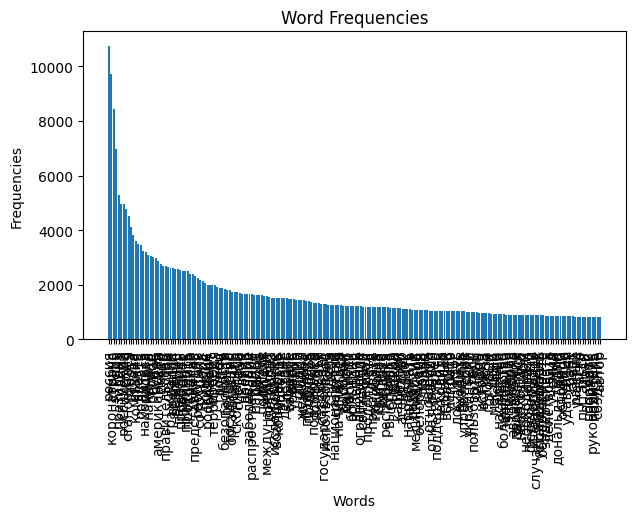

In [31]:
words = [item[0] for item in top_words]
frequencies = [item[1] for item in top_words]

plt.figure(figsize=(7, 4))
plt.bar(words, frequencies)

plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Frequencies')

plt.xticks(rotation=90)

plt.show()

In [32]:
data2.to_csv('/content/processed_data2.csv', index = False)
data.to_csv('/content/processed_data.csv', index = False)
data3.to_csv('/content/processed_data3.csv', index = False)
data4.to_csv('/content/processed_data4.csv', index = False)